In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/BNB-USD.csv', parse_dates=['Date'], index_col='Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-01,1.99695,2.13701,1.92297,2.07023,2.07023,28867200
2017-12-02,2.07706,2.11566,1.99689,2.08416,2.08416,24332700
2017-12-03,2.08541,2.38115,2.05419,2.22725,2.22725,35163500
2017-12-04,2.25809,2.57703,2.25809,2.49168,2.49168,41226200
2017-12-05,2.50181,2.73179,2.50181,2.59530,2.59530,49190000


In [ ]:
df = df.drop(columns = ['Adj Close'])
df = df.dropna() # Drop missing values

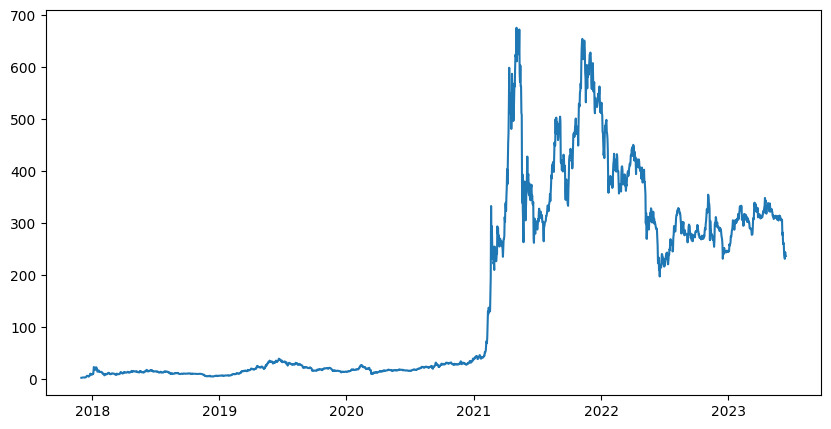

In [ ]:
#Vẽ biểu đồ giá Close (giá close ban đầu của tập dữ liệu)
plt.figure(figsize=(10,5))
plt.plot(df['Close'])
plt.show()

In [ ]:
df.describe()

,Open,High,Low,Close,Volume
count,2023.000000,2023.000000,2023.000000,2023.000000,2.023000e+03
mean,161.347979,166.297493,155.969963,161.433654,9.450179e+08
std,181.008078,186.602895,174.765400,180.911395,1.384881e+09
min,1.996950,2.115660,1.922970,2.070230,9.284000e+03
25%,15.065532,15.586281,14.556532,15.084962,1.657800e+08
50%,29.321781,30.133648,28.491446,29.354368,4.041409e+08
75%,307.720780,314.035584,301.340210,307.773758,1.294453e+09
max,676.315918,690.931946,634.549500,675.684082,1.798295e+10


**I/Chuẩn bị dữ liệu**

**1.Tách dữ liệu thành các tập X(đầu vào) và tập y(đầu ra)**

In [ ]:
x = df[['Open','High','Low','Volume']]
y = df['Close']

In [ ]:
x.head()

,Open,High,Low,Volume
Date,,,,
2017-12-01,1.99695,2.13701,1.92297,28867200
2017-12-02,2.07706,2.11566,1.99689,24332700
2017-12-03,2.08541,2.38115,2.05419,35163500
2017-12-04,2.25809,2.57703,2.25809,41226200
2017-12-05,2.50181,2.73179,2.50181,49190000


In [ ]:
y.head()

Date
2017-12-01    2.07023
2017-12-02    2.08416
2017-12-03    2.22725
2017-12-04    2.49168
2017-12-05    2.59530
Name: Close, dtype: float64

**II/Cắt dữ liệu thành tập train và test, validate**

In [ ]:
from sklearn.model_selection import train_test_split

n_rows = len(df)
train_rows = int(n_rows * 0.7)
test_rows = int(n_rows * 0.2)


# Chia tập dữ liệu thành 3 tập train, test và validate
X_train = x[:train_rows]
X_test = x[train_rows:train_rows+test_rows]
X_validate = x[train_rows+test_rows:]

y_train = y[:train_rows]
y_test = y[train_rows:train_rows+test_rows]
y_validate = y[train_rows+test_rows:]

**III/Áp dụng thuật toán và đánh giá mô hình**

**2/Mô hình Exponential Smoothing (ETS)**

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from itertools import product

In [ ]:
# # Xác định khoảng giá trị của alpha, beta và phi
# alphas = np.linspace(0, 1, num=11)
# betas = np.linspace(0, 1, num=11)
# phis = np.linspace(0, 1, num=11)

# # Tạo ra tất cả các cặp giá trị có thể từ khoảng giá trị đó
# param_combinations = list(product(alphas, betas, phis))

# # Tìm cặp giá trị cho mô hình có độ chính xác tốt nhất trên tập test
# best_params = None
# best_mse = float('inf')
# for params in param_combinations:
#     model = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=30)
#     model_fit = model.fit(smoothing_level=params[0], smoothing_slope=params[1], damping_slope=params[2])
#     y_pred_test = model_fit.forecast(len(y_test))
#     mse = mean_squared_error(y_test, y_pred)
#     if mse < best_mse:
#         best_mse = mse
#         best_params = params


model = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=30)
model_fit_ets = model.fit(0.8,0.5)

#Dự đoán trên tập test và validate
y_pred_test = model_fit_ets.forecast(len(y_test))
y_pred_validate = model_fit_ets.predict(start=X_validate.index[0], end=X_validate.index[-1])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


**Đánh giá mô hình trên tập Test tỉ lệ 7:2:1**

In [ ]:
# Đánh giá mô hình trên tập test
from sklearn import metrics
from sklearn.metrics import r2_score
print('R-squared:', r2_score(y_test, y_pred_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:', metrics.mean_squared_error(y_test, y_pred_test, squared=False))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred_test) * 100)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))

R-squared: -25.03681753482862
MSE: 332237.06609627936
RMSE: 576.4000920335452
MAPE: 164.91151221261865
MAE: 491.4862340326018


**Đánh giá mô hình trên tập Validate tỉ lệ 7:2:1**

In [ ]:
# Đánh giá mô hình trên tập test
print('R-squared:', r2_score(y_validate, y_pred_validate))
print('MSE:', metrics.mean_squared_error(y_validate, y_pred_validate))
print('RMSE:', metrics.mean_squared_error(y_validate, y_pred_validate, squared=False))
print('MAPE:', metrics.mean_absolute_percentage_error(y_validate, y_pred_validate) * 100)
print('MAE:', metrics.mean_absolute_error(y_validate, y_pred_validate))

R-squared: -1687.6231320360341
MSE: 1274964.4080505585
RMSE: 1129.143218573516
MAPE: 379.1849318503882
MAE: 1124.3793345353233


**Dự Đoán Giá Close Trong 30 Ngày Tiếp Theo**

In [ ]:
n_forecast = 30
y_pred_forecast30 = model_fit_ets.forecast(steps=n_forecast)
forecast30_data = pd.DataFrame({'Date': y_pred_forecast30.index, 'Giá Close Dự Đoán trong 30 ngày tiếp theo': y_pred_forecast30})
forecast30_data = forecast30_data.set_index('Date')
forecast30_data

,Giá Close Dự Đoán trong 30 ngày tiếp theo
Date,
2021-10-17,476.044702
2021-10-18,473.642245
2021-10-19,474.199192
2021-10-20,473.596713
2021-10-21,476.191562
2021-10-22,480.981221
2021-10-23,482.455912
2021-10-24,484.391763
2021-10-25,485.208482


**Chênh lệch giữa giá Close thực tế và giá Close dự đoán của mô hình ETS**


In [ ]:

for i in range(len(y_pred_test)):
  y_pred_test[i] = round(y_pred_test[i],0)

moi_ets = pd.DataFrame({'Close thực tế' : y_test.head(),
                    'Close dự đoán' : y_pred_test.head(),
                    'Độ lệch': y_pred_test.head() - y_test.head()})
moi_ets.head()

,Close thực tế,Close dự đoán,Độ lệch
2021-10-17,470.625549,476.0,5.374451
2021-10-18,485.111023,474.0,-11.111023
2021-10-19,488.148865,474.0,-14.148865
2021-10-20,501.020325,474.0,-27.020325
2021-10-21,471.256927,476.0,4.743073


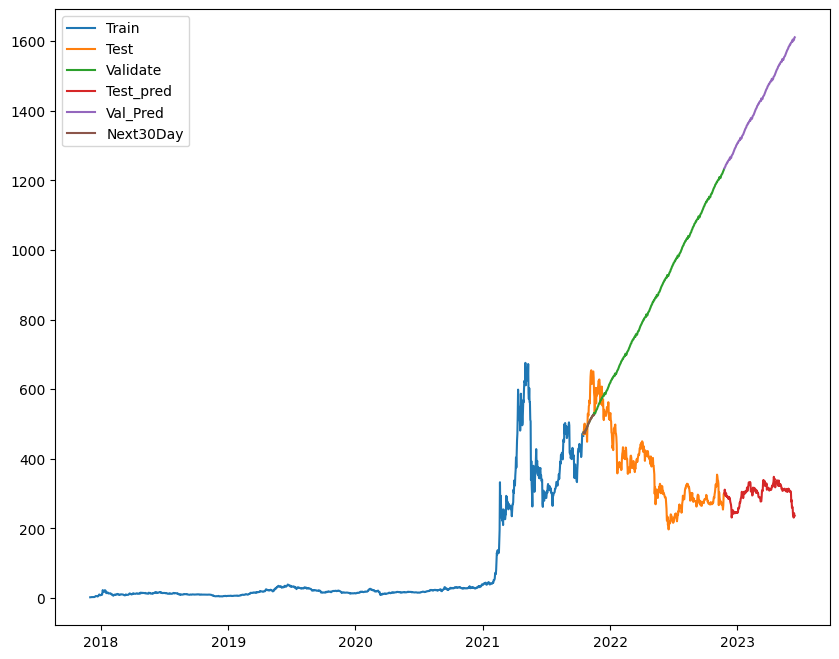

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(y_train.index, y_train)
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, y_pred_test)
plt.plot(y_validate.index, y_validate)
plt.plot(y_validate.index, y_pred_validate)
plt.plot(forecast30_data)
plt.legend(['Train', 'Test', 'Validate', 'Test_pred','Val_Pred','Next30Day'])
plt.show()